In [1]:
import File_for_accesing_src
from Standard_parameters import *
from Vicsek_hooke import *
import numpy as np
import matplotlib.pyplot as plt
from Quiver import *

In [7]:
#Generating data
pos,theta=Vicsek_hooke(v_0,eta,r, N,L,iterations,s,k,l)


In [2]:
#Saving
np.save( "Data/Standard_simulation_pos",pos)
np.save( "Data/Standard_simulation_theta",theta)



NameError: name 'pos' is not defined

In [2]:
#Loading the data
pos=np.load( "Data/Standard_simulation_pos.npy")
theta=np.load( "Data/Standard_simulation_theta.npy")


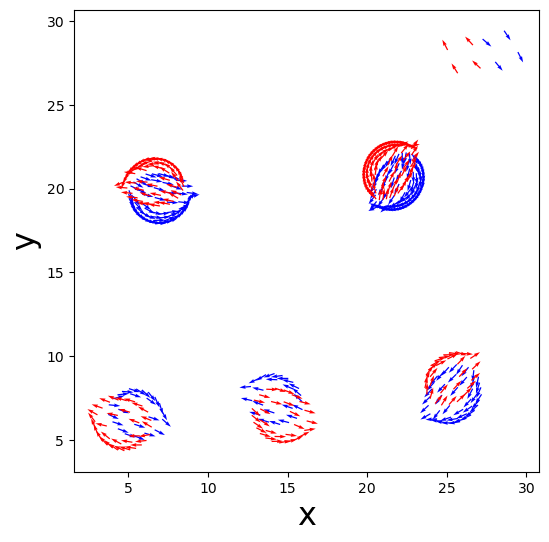

In [13]:
%matplotlib inline

i=600
Quiver(pos[i],theta[i],['blue','red'])
plt.xlabel('x',fontsize=23)
plt.ylabel('y',fontsize=23)
plt.savefig("plots/standard_parameters/Quiver_step_600.pdf")
plt.show()

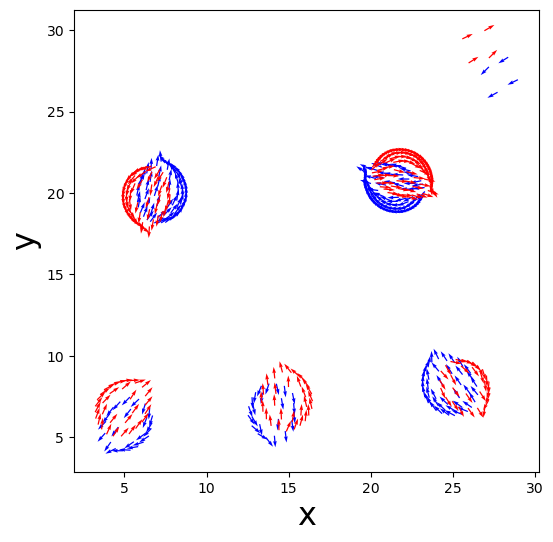

In [52]:
i=615
Quiver(pos[i],theta[i],['blue','red'])
plt.xlabel('x',fontsize=23)
plt.ylabel('y',fontsize=23)
plt.savefig("plots/standard_parameters/Quiver_step_615.pdf")
plt.show()

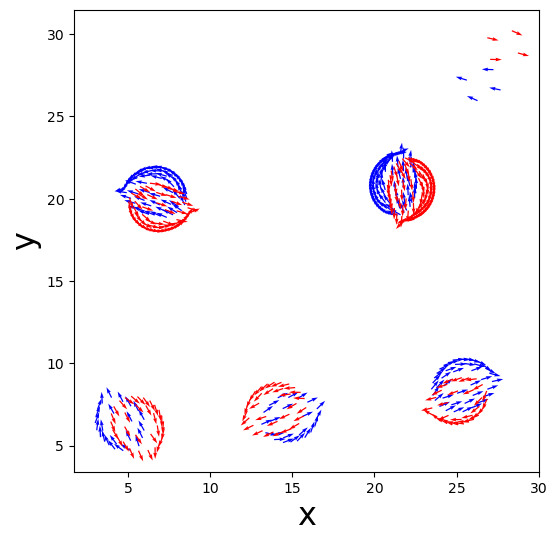

In [53]:
i=630
Quiver(pos[i],theta[i],['blue','red'])
plt.xlabel('x',fontsize=23)
plt.ylabel('y',fontsize=23)
plt.savefig("plots/standard_parameters/Quiver_step_630.pdf")
plt.show()

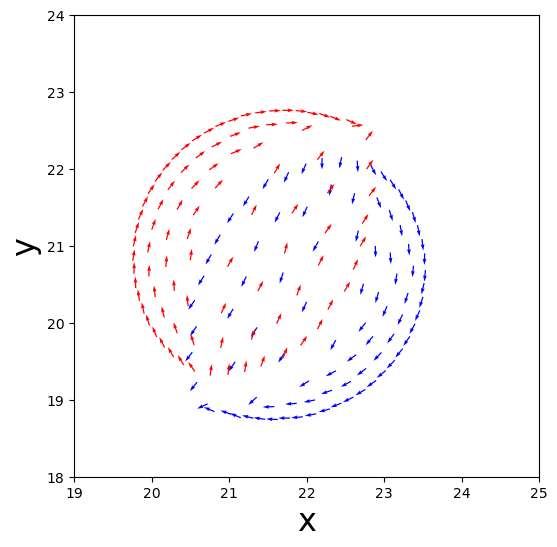

In [54]:
u_x=25
l_x=19
l_y=18
u_y=24
#Now zooming in the upper right
i=600
Quiver(pos[i],theta[i],['blue','red'])
plt.xlabel('x',fontsize=23)
plt.ylabel('y',fontsize=23)
plt.xlim(l_x,u_x)
plt.ylim(l_y,u_y)
plt.savefig("plots/standard_parameters/Quiver_step_600_zoomed.pdf")
plt.show()

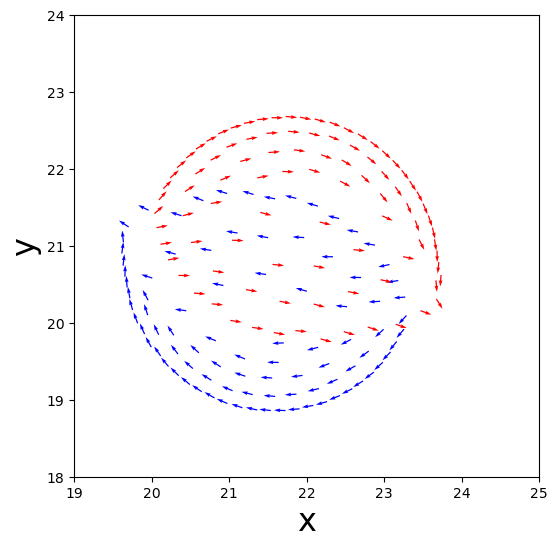

In [55]:
#Now zooming in the upper right
i=615
Quiver(pos[i],theta[i],['blue','red'])
plt.xlabel('x',fontsize=23)
plt.ylabel('y',fontsize=23)
plt.xlim(l_x,u_x)
plt.ylim(l_y,u_y)
plt.savefig("plots/standard_parameters/Quiver_step_615_zoomed.pdf")
plt.show()

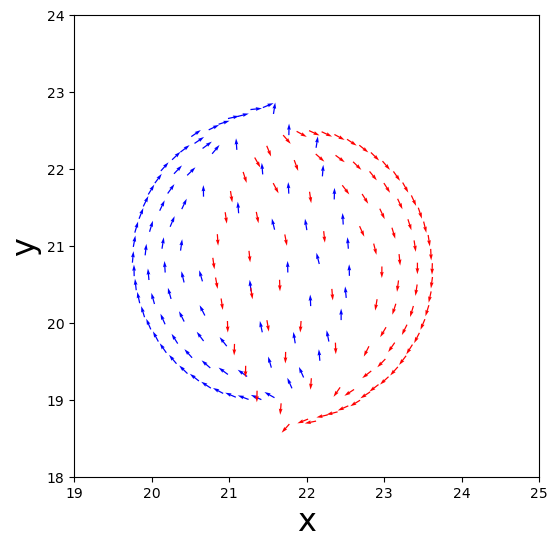

In [56]:
#Now zooming in the upper right
i=630
Quiver(pos[i],theta[i],['blue','red'])
plt.xlabel('x',fontsize=23)
plt.ylabel('y',fontsize=23)
plt.xlim(l_x,u_x)
plt.ylim(l_y,u_y)
plt.savefig("plots/standard_parameters/Quiver_step_630_zoomed.pdf")
plt.show()

In [3]:
from Animate_c import *

%matplotlib qt

#Storing the animation
anim=Animate_c(pos,theta,['blue','red'], [0.5,0.5], 1000,50)
anim.save("Animations/animation_with_standard_parameters.gif")

In [4]:
#plotting for single particle

particle_index=200
x=np.array([ s[particle_index][0] for s in pos] )
y=np.array([ s[particle_index][1] for s in pos] )
theta_index=theta.transpose()[particle_index]

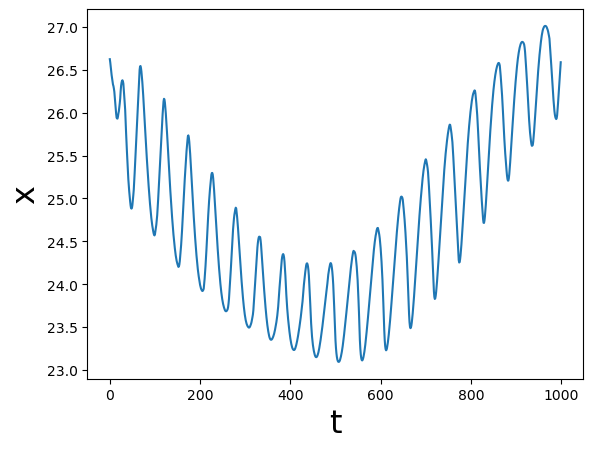

In [57]:
plt.plot(x)
plt.ylabel('x',fontsize=23)
plt.xlabel('t',fontsize=23)
plt.savefig("plots/standard_parameters/x_plot.pdf")
plt.show()

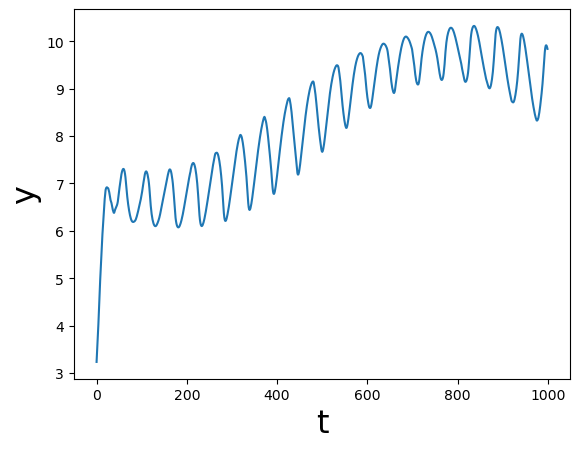

In [58]:
plt.plot(y)
plt.ylabel('y',fontsize=23)
plt.xlabel('t',fontsize=23)
plt.savefig("plots/standard_parameters/y_plot.pdf")
plt.show()

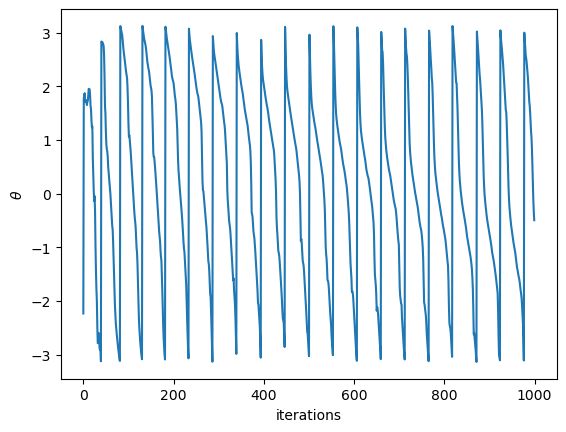

In [12]:
plt.plot(theta_index)
plt.ylabel(r'$\theta$')
plt.xlabel('iterations')
plt.savefig("plots/standard_parameters/theta_plot.pdf")
plt.show()

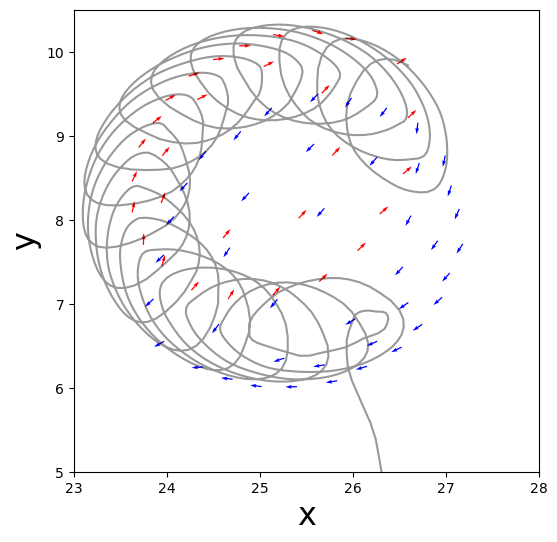

In [59]:
i=600

Quiver(pos[i],theta[i],['blue','red'])
plt.plot(x,y,color='black',alpha=0.4)
plt.xlim(23,28)
plt.ylim(5,10.5)
plt.xlabel('x',fontsize=23)
plt.ylabel('y',fontsize=23)
plt.savefig("plots/standard_parameters/xy_plot.pdf")
plt.show()

In [5]:
#Now lets look at the motion with the cluster rotation taken away.
from Analysis import *
from functions import *

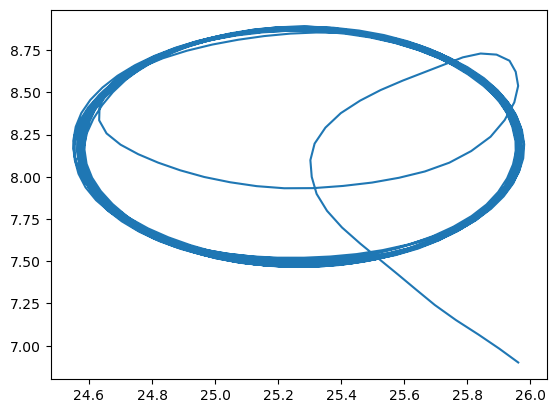

In [6]:
%matplotlib inline


#First we need to find the indexes beloning to the cluster furter above 
indexes_in_cluster=return_partilces_from_box_indexes(pos[-1],23,28,5,10.5)
#Now finding the blue center
blue_indexes,red_indexes=filter_out_blue_and_red_indexes(indexes_in_cluster,N/2)
blue_center=find_center(pos,blue_indexes)
#Now plotting the blue center
plt.plot(blue_center.transpose()[0],blue_center.transpose()[1])



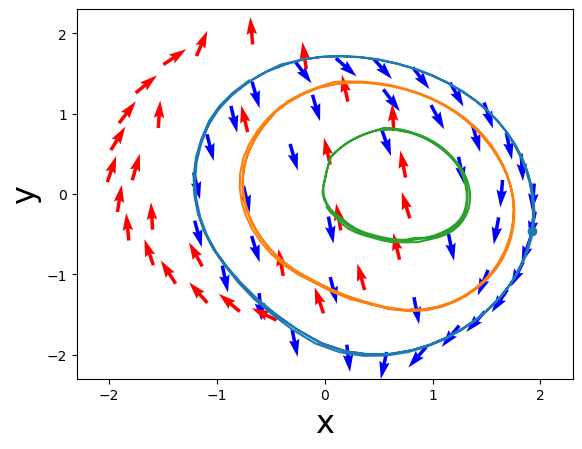

In [7]:
%matplotlib inline


i=-1



#Now lets take away the rotaion
pos_c,theta_c,colors=take_away_rotation(pos,theta,indexes_in_cluster,blue_center,N/2)
plt.quiver(pos_c[i][:,0],pos_c[i][:,1],np.cos(theta_c[i]),np.sin(theta_c[i]),color=colors  )
cut_off=850
plt.scatter(pos_c.transpose((1,2,0))[0][0][225],pos_c.transpose((1,2,0))[0][1][225])

plt.plot(pos_c.transpose((1,2,0))[0][0][cut_off:],pos_c.transpose((1,2,0))[0][1][cut_off:])
plt.plot(pos_c.transpose((1,2,0))[2][0][cut_off:],pos_c.transpose((1,2,0))[2][1][cut_off:])
plt.plot(pos_c.transpose((1,2,0))[5][0][cut_off:],pos_c.transpose((1,2,0))[5][1][cut_off:])
plt.xlabel('x',fontsize=23)
plt.ylabel('y',fontsize=23)
plt.xlim(-2.3,2.3)
plt.ylim(-2.3,2.3)
plt.savefig("Plots/standard_parameters/trajectories_with_quiver_without_rotation.pdf")
plt.show()




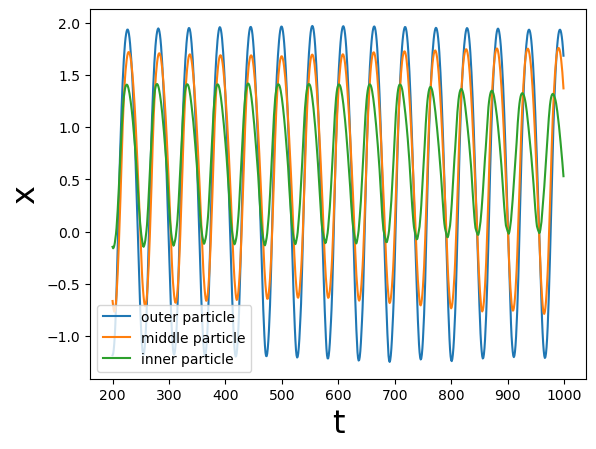

In [61]:


cut_plot=200

iterations_to_plot_with=[i for i in range(cut_plot,iterations) ]


plt.plot(iterations_to_plot_with,pos_c.transpose((1,2,0))[0][0][200:],label='outer particle')
plt.plot(iterations_to_plot_with,pos_c.transpose((1,2,0))[2][0][200:],label='middle particle'   )
plt.plot(iterations_to_plot_with,pos_c.transpose((1,2,0))[5][0][200:],label='inner particle')
plt.xlabel('t',fontsize=23)
plt.ylabel('x',fontsize=23)
plt.legend()
plt.savefig("Plots/standard_parameters/x_component_without_rotation.pdf")
plt.show()

In [17]:
%matplotlib qt
#plt.plot(theta_c.transpose()[0][cut_plot:],label='outermost_particle')
plt.plot(iterations_to_plot_with,theta_c.transpose()[2][cut_plot:],label='middle particle'   )
#plt.plot(theta_c.transpose()[5][cut_off:],label='inner particle')
plt.legend()

In [18]:
#Now storing an animation of the cluster without the rotation


from matplotlib.animation import FuncAnimation

def Animate_c(pos, theta,colors,  number_of_frames,  interval=1,xlims=None,ylims=None):
    fig, ax = plt.subplots(figsize=(6, 6))

    #The number of particles
    N=len(pos[0])

    if xlims is not None:
        ax.set_xlim(xlims[0], xlims[1])
    else:
        ax.set_xlim(np.min(pos) - 1, np.max(pos) + 1)

    if ylims is not None:
        ax.set_ylim(ylims[0], ylims[1])
    else:
        ax.set_ylim(np.min(pos) - 1, np.max(pos) + 1)

    # Set up the initial quiver plot
    qv = ax.quiver(pos[0][:, 0], pos[0][:, 1], np.cos(theta[0]), np.sin(theta[0]))
    

    
    # Setting plot limits (you can adjust according to your needs)
    ax.set_xlim(np.min(pos) - 1, np.max(pos) + 1)
    ax.set_ylim(np.min(pos) - 1, np.max(pos) + 1)
    
    # Animation function
    def animate(i):
        # Update the position and direction of the quivers
        qv.set_offsets(pos[i])
        qv.set_UVC(np.cos(theta[i]), np.sin(theta[i]))
        qv.set_color(colors)

        # Fix the limits explicitly for every frame
        if xlims is not None:
            ax.set_xlim(xlims[0], xlims[1])
        if ylims is not None:
            ax.set_ylim(ylims[0], ylims[1])
             

        
        return qv, 

    # Run the animation
    anim = FuncAnimation(fig, animate, np.arange(1, number_of_frames), interval=interval, blit=True)
   
    plt.show()
    return anim
    

In [17]:
%matplotlib qt
anim_no_rotation=Animate_c(pos_c,theta_c,colors,1000,100,[-3,3],[-3,3])
anim_no_rotation.save("Animations/animation_with_standard_parameters_no_rotation.gif")

In [18]:
#plotting velocities without rotation


V0=[    np.linalg.norm( pos_c.transpose(1,0,2)[0][j+1]-pos_c.transpose(1,0,2)[0][j]) for j in range(1000-1) ]
V2=[    np.linalg.norm( pos_c.transpose(1,0,2)[2][j+1]-pos_c.transpose(1,0,2)[2][j]) for j in range(1000-1) ]
V5=[    np.linalg.norm( pos_c.transpose(1,0,2)[5][j+1]-pos_c.transpose(1,0,2)[5][j]) for j in range(1000-1) ]
%matplotlib qt

plt.plot(V0[800:])
plt.plot(V2[800:])
plt.plot(V5[800:])


In [19]:
plt.plot(theta_c.transpose()[0][800:])

plt.plot(theta_c.transpose()[1][800:])

plt.plot(theta_c.transpose()[2][800:])

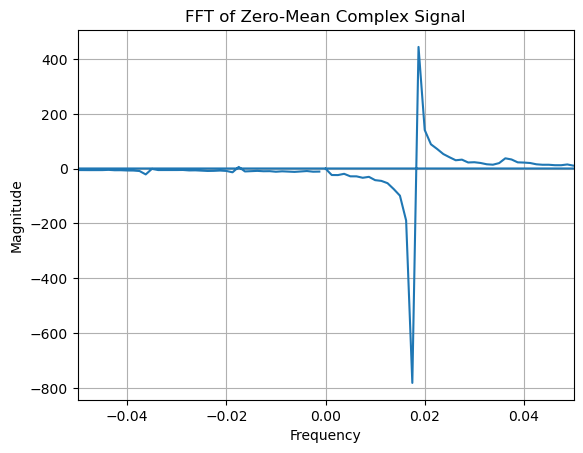

In [29]:


# Transpose once and extract the first "channel" or batch
trans = pos_c.transpose(1, 0, 2)[-1][200:]  # shape: (N, 2)

# Subtract mean along the time axis (axis=0)
trans_centered = trans - trans.mean(axis=0)

# Create complex signal from centered data
complex0 = trans_centered[:, 0] + 1j * trans_centered[:, 1]

# Compute FFT
fft_result = np.fft.fft(complex0)
freq = np.fft.fftfreq(complex0.shape[0])  # Add d=... if needed

# Plot
plt.xlim(-0.05,0.05)
plt.plot(freq, np.real(fft_result))
#plt.plot(freq, np.imag(fft_result))
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("FFT of Zero-Mean Complex Signal")
plt.grid(True)
plt.show()


In [27]:
1/0.02

50.0

In [31]:
4.6/0.2+17

40.0